# Bootstrap between ROIs


This script bootstraps the following differences:
* Ketamine-Baseline
* Placebo-Baseline
* (Ketamine-Baseline) - (Placebo-Baseline)

for regions p32, s24, s32 and OFC5 that were previously chosen due to the results of the within-ROI analysis.
Then the mean of these bootstrap results is taken and depicted in heatmap to cpmare the conditions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import seaborn as sns
import os
import pickle
import copy
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats
import scipy.stats as st

In [2]:
# UMAP results
UMAP_k = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Ket/UMAP_ROI_Ketamine', allow_pickle=True)
UMAP_b_k = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Ket/UMAP_ROI_Baseline_ketamine', allow_pickle=True)
UMAP_p = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Placebo/UMAP_ROI_Placebo', allow_pickle=True)
UMAP_b_p = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Placebo/UMAP_ROI_Baseline_placebo', allow_pickle=True)

In [5]:
embedding_k = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Ket/UMAP_Ketamine.npy', allow_pickle=True)
embedding_b_k = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Ket/UMAP_Baseline_ketamine.npy', allow_pickle=True)
embedding_p = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Placebo/UMAP_Placebo.npy', allow_pickle=True)
embedding_b_p = np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Placebo/UMAP_Baseline_placebo.npy', allow_pickle=True)

In [19]:
roi_labels= np.load('C:/Users/canlab/Documents/GitHub/Masterthesis/roi_labels.npy', allow_pickle=True)

In [25]:
labels= np.load('C:/Users/canlab/Desktop/Masterthesis_python/Voxel_ID_ROI_Membership', allow_pickle=True)

Calculating the distances of all voxels to all other ROI centroids

In [3]:
def calculate_dist_voxels_to_centroids(input_df, embedding):
    # split dataframe according to ROIs
    split_df = input_df.groupby('ROI')
    # arithmetic mean values for all ROIs used as centroids of the ROIs
    ROI_mean = split_df.mean()
    #display(ROI_mean)
    # mean df to dictionary
    ROI_mean_dict = ROI_mean.to_dict()
    # save all distances
    centroid_dist = []
    # dictionary to save distances to centroid for each ROI
    dist_to_centroid = {}
    keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']
    # loop through ROI_mean_dict to get the mean for the ROI
    for entry in keys:
        dist =0
        # get mean values for ROIs
        x_mean = ROI_mean_dict['x'][entry]
        y_mean = ROI_mean_dict['y'][entry]
        roi_to_voxel = []
        for j in range(len(embedding)):
            x = embedding[j][0]
            y = embedding[j][1]
            dist = np.sqrt(((x-x_mean)**2)+((y-y_mean)**2))  
            roi_to_voxel.append(dist)
        # save distance to centroid in dictionary with ROI
        dist_to_centroid[entry] = roi_to_voxel

    return dist_to_centroid

In [26]:
b_k

{'OFC1': [0.796759996258371,
  1.0649231094806377,
  0.8754863054015845,
  0.7655029798225058,
  0.6624821803052633,
  0.822320081063285,
  1.0467037416109621,
  1.022378760181733,
  0.5276179077846274,
  0.7024992874705865,
  1.0015089315990964,
  0.9483856115559464,
  0.8013164242606756,
  0.8319045848628862,
  0.7398941574606761,
  0.960378066316993,
  0.7874508157873283,
  0.9670380021670612,
  0.9109026792822424,
  0.6950400499630458,
  0.6630412419223919,
  0.9359308601758283,
  0.9191569986737258,
  0.9152704436911421,
  0.872728706432815,
  0.8393776150728579,
  0.8574352972322788,
  1.5106628226040197,
  0.9750342449672639,
  0.8720690009204318,
  0.8240338139973217,
  0.8533568832817429,
  0.8787248643560808,
  0.9564040244381989,
  0.9536237333497131,
  1.3471654792514283,
  0.768521746925046,
  0.8326747639671058,
  0.8577845885131902,
  0.852415998909231,
  0.894905853884264,
  0.9974549294304396,
  0.8876993303441556,
  0.8791650542731887,
  1.6426422998117534,
  0.841159

In [32]:
b_k = calculate_dist_voxels_to_centroids(UMAP_b_k, embedding_b_k)
np.save('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/B_K_all_centroids.npy', b_k)
display(pd.DataFrame(b_k))

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
0,0.796760,1.314548,2.987035,6.063710,5.155892,7.066412,6.290641,3.806401,6.703955,1.872714,3.496963,4.621810,7.984564,7.438621,8.161062,10.531948,8.289504,8.145488
1,1.064923,0.580501,1.921569,4.927585,4.055257,5.879740,5.136896,4.884468,7.858663,0.926741,4.583068,5.572870,9.117636,8.545242,9.271543,10.267916,7.771080,7.476282
2,0.875486,1.342842,3.007461,6.076797,5.174993,7.066945,6.299958,3.880017,6.761255,1.898196,3.569879,4.708202,8.046021,7.505038,8.226568,10.623606,8.367606,8.213481
3,0.765503,1.361257,3.037561,6.121183,5.205911,7.139260,6.352856,3.666445,6.574979,1.919628,3.357477,4.476407,7.852263,7.302826,8.025846,10.454409,8.242726,8.118214
4,0.662482,1.235042,2.911337,5.994695,5.079812,7.013178,6.226309,3.752869,6.677478,1.793544,3.445084,4.542051,7.950683,7.396283,8.120141,10.386644,8.151842,8.015968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,6.810700,6.353863,4.953008,3.412102,3.460574,4.180135,3.595459,9.197891,11.997478,5.858260,9.047267,8.970049,12.849246,12.135028,12.773380,5.352440,2.276098,1.207011
11879,6.823507,6.362294,4.953849,3.383992,3.443962,4.143013,3.564626,9.226698,12.030457,5.864751,9.074961,9.003239,12.884841,12.170794,12.809975,5.392238,2.318862,1.244220
11880,6.798444,6.336026,4.926098,3.357868,3.415623,4.121024,3.539459,9.208641,12.015140,5.838035,9.056252,8.988096,12.871556,12.157655,12.797546,5.412245,2.335945,1.266056
11881,6.827731,6.365369,4.954924,3.377163,3.440338,4.133587,3.557020,9.235043,12.039849,5.867319,9.083024,9.012688,12.894884,12.180879,12.820263,5.402504,2.330023,1.253828


In [33]:
k = calculate_dist_voxels_to_centroids(UMAP_k, embedding_k)
np.save('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/K_all_centroids.npy', k)
display(pd.DataFrame(k))

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
0,0.476556,1.303664,2.471945,5.260872,4.304799,6.845061,6.068285,4.411432,7.870460,1.686987,4.671982,5.479752,9.514059,8.705477,9.589696,8.044554,6.787460,7.050410
1,0.490172,1.331263,2.511972,5.303064,4.346957,6.887152,6.110473,4.377626,7.832954,1.716679,4.638781,5.451303,9.477886,8.670387,9.554516,8.057297,6.813693,7.082008
2,0.486076,1.348215,2.559193,5.363218,4.405778,6.949358,6.171044,4.309970,7.764586,1.737475,4.571378,5.386750,9.409563,8.602285,9.486389,8.044658,6.825867,7.105684
3,0.518099,1.128669,2.155152,4.917070,3.962061,6.500890,5.724270,4.701549,8.185307,1.482075,4.957556,5.729950,9.819121,9.002848,9.887546,7.964750,6.593673,6.808954
4,0.357384,1.195083,2.404697,5.227510,4.267050,6.819362,6.036315,4.372752,7.850082,1.582036,4.630554,5.420193,9.485931,8.671908,9.556483,7.925381,6.676634,6.949037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,6.530019,5.648055,4.548499,3.855430,3.920134,4.436172,3.924095,9.348944,12.733107,5.250890,9.462547,9.438932,13.933301,13.015330,13.810042,5.084536,2.139494,0.974076
11879,6.522676,5.641021,4.538010,3.837142,3.903658,4.417333,3.905176,9.349235,12.735475,5.243912,9.463357,9.442061,13.937428,13.019466,13.814712,5.100510,2.154612,0.991907
11880,6.519902,5.638282,4.534927,3.833929,3.900293,4.414712,3.902243,9.347461,12.734025,5.241179,9.461662,9.440737,13.936271,13.018311,13.813649,5.101924,2.155788,0.993970
11881,6.533840,5.652225,4.548530,3.842134,3.911052,4.418228,3.907928,9.360419,12.746342,5.255123,9.474475,9.452777,13.947918,13.029954,13.825066,5.104771,2.159694,0.993752


In [34]:
b_p = calculate_dist_voxels_to_centroids(UMAP_b_p, embedding_b_p)
np.save('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/B_P_all_centroids.npy', b_p)
display(pd.DataFrame(b_p))

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
0,0.496087,0.417714,1.097115,3.109820,2.708357,4.487827,3.703238,3.525037,5.785990,0.623717,3.674051,3.535489,6.881431,6.330318,7.122691,9.250162,6.987257,6.459555
1,1.062259,0.897954,2.299891,4.330495,3.913119,5.721408,4.946197,2.280520,4.557528,1.077921,2.430661,2.435277,5.638430,5.092968,5.877094,9.708394,7.649259,7.254516
2,0.178470,0.715750,1.419720,3.130846,2.700350,4.535224,3.792780,3.477562,5.637889,1.029542,3.631691,3.656656,6.770378,6.300292,7.051076,9.724823,7.447157,6.899308
3,0.201214,0.821222,1.619594,3.258994,2.821530,4.667026,3.939250,3.372203,5.492270,1.157428,3.527541,3.617577,6.635428,6.194084,6.929170,9.908014,7.641475,7.098883
4,0.191450,0.770129,1.707790,3.402033,2.965787,4.809456,4.077361,3.225358,5.352898,1.116570,3.380651,3.477599,6.492985,6.047382,6.784141,9.915283,7.672018,7.146554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,6.041916,5.676198,4.581892,4.860494,5.040592,4.821767,4.363663,8.294254,10.704015,5.404015,8.398071,7.539871,11.560432,10.635370,11.582158,4.819201,2.174588,1.193383
11879,6.059023,5.693790,4.598381,4.871340,5.052632,4.827926,4.372417,8.312519,10.722282,5.421787,8.416338,7.558025,11.578645,10.653428,11.600265,4.814098,2.170377,1.185532
11880,6.088592,5.721102,4.630031,4.909929,5.090652,4.866390,4.411355,8.331898,10.741122,5.447990,8.435241,7.572962,11.594755,10.666880,11.614393,4.776115,2.132916,1.146679
11881,6.068828,5.699615,4.612200,4.904845,5.083210,4.869659,4.410157,8.306159,10.715166,5.425761,8.409317,7.545741,11.567865,10.639266,11.586945,4.771084,2.126399,1.146412


In [35]:
p = calculate_dist_voxels_to_centroids(UMAP_p, embedding_p)
np.save('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/P_all_centroids.npy', p)
display(pd.DataFrame(p))

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
0,0.082095,0.614267,1.438917,3.156129,2.808825,4.439039,3.814185,2.863816,5.066828,0.904829,2.798172,2.589376,6.226907,5.670079,6.314122,10.605520,8.580989,8.117558
1,0.648925,0.534193,0.878395,2.798038,2.466728,4.044367,3.378538,3.243659,5.541876,0.699482,3.156278,2.703611,6.672658,6.041781,6.723053,10.079693,8.024262,7.548734
2,0.391891,0.884318,1.365352,2.873851,2.522546,4.167286,3.568036,3.172196,5.317898,1.156336,3.113927,2.930652,6.495414,5.974270,6.602051,10.683422,8.602645,8.097356
3,0.505906,0.930590,1.272583,2.745493,2.394467,4.038430,3.439184,3.295216,5.446991,1.187766,3.234874,3.020639,6.624042,6.098582,6.729060,10.622746,8.524448,8.007297
4,0.274254,0.879238,1.778235,3.385180,3.033103,4.680069,4.080512,2.687516,4.804429,1.169378,2.639337,2.603140,5.983765,5.481186,6.097211,10.933999,8.923140,8.463568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,7.436613,7.015142,5.940318,5.675136,5.862912,5.119749,4.889304,9.396135,11.867681,6.828009,9.246962,8.046856,12.775537,11.775531,12.608759,4.788921,2.200059,1.123040
11879,7.439635,7.016695,5.944212,5.686842,5.873623,5.135258,4.902360,9.393876,11.865296,6.828844,9.244519,8.042779,12.771614,11.770178,12.603794,4.768415,2.179114,1.104175
11880,7.379372,6.958190,5.883029,5.621940,5.808674,5.072485,4.837827,9.341094,11.812724,6.771291,9.192056,7.993332,12.721850,11.723289,12.556098,4.819751,2.228391,1.161738
11881,7.413033,6.990497,5.917425,5.660456,5.846951,5.110846,4.876501,9.369259,11.840746,6.802884,9.219998,8.019186,12.747930,11.747416,12.580770,4.786278,2.195875,1.125296


In [36]:
# concat the df with the labels
k_df=pd.DataFrame(k)
b_k_df=pd.DataFrame(b_k)
p_df=pd.DataFrame(p)
b_p_df=pd.DataFrame(b_p)

In [37]:
k_df=pd.concat([k_df,labels], axis=1)

In [38]:
k_df

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate,ID,Label
0,0.476556,1.303664,2.471945,5.260872,4.304799,6.845061,6.068285,4.411432,7.870460,1.686987,4.671982,5.479752,9.514059,8.705477,9.589696,8.044554,6.787460,7.050410,205889,OFC1
1,0.490172,1.331263,2.511972,5.303064,4.346957,6.887152,6.110473,4.377626,7.832954,1.716679,4.638781,5.451303,9.477886,8.670387,9.554516,8.057297,6.813693,7.082008,205890,OFC1
2,0.486076,1.348215,2.559193,5.363218,4.405778,6.949358,6.171044,4.309970,7.764586,1.737475,4.571378,5.386750,9.409563,8.602285,9.486389,8.044658,6.825867,7.105684,205980,OFC1
3,0.518099,1.128669,2.155152,4.917070,3.962061,6.500890,5.724270,4.701549,8.185307,1.482075,4.957556,5.729950,9.819121,9.002848,9.887546,7.964750,6.593673,6.808954,206071,OFC1
4,0.357384,1.195083,2.404697,5.227510,4.267050,6.819362,6.036315,4.372752,7.850082,1.582036,4.630554,5.420193,9.485931,8.671908,9.556483,7.925381,6.676634,6.949037,206162,OFC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,6.530019,5.648055,4.548499,3.855430,3.920134,4.436172,3.924095,9.348944,12.733107,5.250890,9.462547,9.438932,13.933301,13.015330,13.810042,5.084536,2.139494,0.974076,491091,Caudate
11879,6.522676,5.641021,4.538010,3.837142,3.903658,4.417333,3.905176,9.349235,12.735475,5.243912,9.463357,9.442061,13.937428,13.019466,13.814712,5.100510,2.154612,0.991907,491182,Caudate
11880,6.519902,5.638282,4.534927,3.833929,3.900293,4.414712,3.902243,9.347461,12.734025,5.241179,9.461662,9.440737,13.936271,13.018311,13.813649,5.101924,2.155788,0.993970,491273,Caudate
11881,6.533840,5.652225,4.548530,3.842134,3.911052,4.418228,3.907928,9.360419,12.746342,5.255123,9.474475,9.452777,13.947918,13.029954,13.825066,5.104771,2.159694,0.993752,491364,Caudate


In [39]:
b_k_df

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
0,0.796760,1.314548,2.987035,6.063710,5.155892,7.066412,6.290641,3.806401,6.703955,1.872714,3.496963,4.621810,7.984564,7.438621,8.161062,10.531948,8.289504,8.145488
1,1.064923,0.580501,1.921569,4.927585,4.055257,5.879740,5.136896,4.884468,7.858663,0.926741,4.583068,5.572870,9.117636,8.545242,9.271543,10.267916,7.771080,7.476282
2,0.875486,1.342842,3.007461,6.076797,5.174993,7.066945,6.299958,3.880017,6.761255,1.898196,3.569879,4.708202,8.046021,7.505038,8.226568,10.623606,8.367606,8.213481
3,0.765503,1.361257,3.037561,6.121183,5.205911,7.139260,6.352856,3.666445,6.574979,1.919628,3.357477,4.476407,7.852263,7.302826,8.025846,10.454409,8.242726,8.118214
4,0.662482,1.235042,2.911337,5.994695,5.079812,7.013178,6.226309,3.752869,6.677478,1.793544,3.445084,4.542051,7.950683,7.396283,8.120141,10.386644,8.151842,8.015968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,6.810700,6.353863,4.953008,3.412102,3.460574,4.180135,3.595459,9.197891,11.997478,5.858260,9.047267,8.970049,12.849246,12.135028,12.773380,5.352440,2.276098,1.207011
11879,6.823507,6.362294,4.953849,3.383992,3.443962,4.143013,3.564626,9.226698,12.030457,5.864751,9.074961,9.003239,12.884841,12.170794,12.809975,5.392238,2.318862,1.244220
11880,6.798444,6.336026,4.926098,3.357868,3.415623,4.121024,3.539459,9.208641,12.015140,5.838035,9.056252,8.988096,12.871556,12.157655,12.797546,5.412245,2.335945,1.266056
11881,6.827731,6.365369,4.954924,3.377163,3.440338,4.133587,3.557020,9.235043,12.039849,5.867319,9.083024,9.012688,12.894884,12.180879,12.820263,5.402504,2.330023,1.253828


In [40]:
b_k_df=pd.concat([b_k_df,labels], axis=1)
p_df=pd.concat([p_df,labels], axis=1)
b_p_df=pd.concat([b_p_df,labels], axis=1)

### Split by ROI

In [54]:
s24_b_k = b_k_df[b_k_df['Label']=='s24'].drop(['Label', 'ID'], axis=1)
s24_k = k_df[k_df['Label']=='s24'].drop(['Label', 'ID'], axis=1)
s24_p = p_df[p_df['Label']=='s24'].drop(['Label', 'ID'], axis=1)
s24_b_p = b_p_df[b_p_df['Label']=='s24'].drop(['Label', 'ID'], axis=1)

In [55]:
s24_b_k

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
1705,0.555697,0.675660,1.989418,5.039976,4.091274,6.151866,5.299385,4.092217,7.148979,0.983200,3.814296,4.610722,8.348581,7.733073,8.459645,9.265528,6.948829,6.798873
1732,0.414069,0.984774,2.412185,5.459055,4.508290,6.574526,5.720132,3.685570,6.736430,1.386410,3.403676,4.245118,7.944225,7.335078,8.062173,9.386018,7.170719,7.075998
2214,1.352567,0.579803,1.297697,4.321024,3.437567,5.304954,4.538418,5.215326,8.240378,0.425069,4.924212,5.802902,9.471936,8.875421,9.602850,9.830318,7.251231,6.910894
2232,1.337401,0.592938,1.422075,4.421735,3.547761,5.387404,4.633757,5.207044,8.220377,0.555718,4.912929,5.820200,9.459857,8.869564,9.596937,9.966607,7.392510,7.052042
2233,0.843328,0.462163,1.586118,4.653603,3.711252,5.750950,4.907740,4.504810,7.562113,0.578639,4.227373,5.007585,8.760458,8.143102,8.869439,9.250651,6.830970,6.617250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,6.820210,7.592614,8.997100,11.859235,10.900358,13.069400,12.152996,2.963753,0.364719,8.034764,3.247261,2.797815,1.307027,0.857019,1.520031,11.665501,11.116179,11.653881
6015,1.613247,0.836126,1.120708,4.090737,3.222005,5.056131,4.301568,5.471887,8.500427,0.534797,5.181935,6.045355,9.729474,9.130525,9.857926,9.829770,7.197965,6.818836
6016,1.399158,0.689027,0.997961,4.086229,3.161662,5.150442,4.328476,5.137414,8.194131,0.141856,4.859671,5.626613,9.392853,8.774272,9.500401,9.294967,6.727174,6.411055
6021,2.358943,1.585964,0.513459,3.254149,2.398993,4.227461,3.463817,6.146328,9.200898,1.079958,5.867370,6.625316,10.402291,9.783414,10.509408,9.489405,6.720307,6.239417


In [56]:
s32_b_k = b_k_df[b_k_df['Label']=='s32'].drop(['Label', 'ID'], axis=1)
s32_k = k_df[k_df['Label']=='s32'].drop(['Label', 'ID'], axis=1)
s32_p = p_df[p_df['Label']=='s32'].drop(['Label', 'ID'], axis=1)
s32_b_p = b_p_df[b_p_df['Label']=='s32'].drop(['Label', 'ID'], axis=1)

In [57]:
p32_b_k = b_k_df[b_k_df['Label']=='p32'].drop(['Label', 'ID'], axis=1)
p32_k = k_df[k_df['Label']=='p32'].drop(['Label', 'ID'], axis=1)
p32_p = p_df[p_df['Label']=='p32'].drop(['Label', 'ID'], axis=1)
p32_b_p = b_p_df[b_p_df['Label']=='p32'].drop(['Label', 'ID'], axis=1)

In [58]:
OFC5_b_k = b_k_df[b_k_df['Label']=='OFC5'].drop(['Label', 'ID'], axis=1)
OFC5_k = k_df[k_df['Label']=='OFC5'].drop(['Label', 'ID'], axis=1)
OFC5_p = p_df[p_df['Label']=='OFC5'].drop(['Label', 'ID'], axis=1)
OFC5_b_p = b_p_df[b_p_df['Label']=='OFC5'].drop(['Label', 'ID'], axis=1)

In [59]:
OFC5_b_k

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
3415,7.169932,6.441367,4.776312,1.701350,2.661090,0.856088,1.445259,10.642069,13.690895,5.888956,10.404259,10.817937,14.771645,14.095541,14.798977,9.149099,6.082650,4.995132
3441,7.196851,6.471275,4.803882,1.722630,2.679299,0.924024,1.475444,10.654411,13.701025,5.917935,10.418052,10.822133,14.777595,14.100228,14.802673,9.088845,6.025974,4.935375
3442,7.142342,6.414751,4.748892,1.671836,2.630866,0.850877,1.418442,10.610576,13.658932,5.862020,10.373096,10.784820,14.738857,14.062521,14.765784,9.119161,6.051415,4.965053
3443,7.171341,6.443609,4.777867,1.700963,2.659982,0.870379,1.447312,10.639551,13.687809,5.890928,10.402123,10.813309,14.767480,14.091051,14.794236,9.130473,6.064596,4.976571
3464,6.432434,5.681356,4.048966,1.178296,2.082361,0.116737,0.859762,10.028245,13.092454,5.139987,9.776913,10.286411,14.213472,13.551437,14.263977,9.495294,6.388216,5.367337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,9.053792,9.831932,11.272276,14.149943,13.190750,15.357897,14.443212,5.232008,2.168204,10.290582,5.502900,5.060093,1.152538,1.868262,1.375060,13.458315,13.207202,13.812765
7020,9.081474,9.860631,11.312625,14.202652,13.242703,15.406731,14.494695,5.273286,2.205362,10.323850,5.539962,5.132002,1.260879,1.971321,1.507495,13.583149,13.309980,13.907572
7031,9.049860,9.828388,11.273010,14.155328,13.195838,15.361838,14.448138,5.232842,2.166874,10.288704,5.502203,5.072612,1.179395,1.893164,1.413894,13.493714,13.232618,13.834807
7032,9.242841,10.020991,11.460768,14.336407,13.377393,15.545138,14.629939,5.420522,2.357189,10.479567,5.691744,5.240945,1.314667,2.032228,1.502477,13.590625,13.367014,13.979342


## Bootstrap

Prep:

In [60]:
# ketamine - baseline
s24_k_sub_b = s24_k - s24_b_k
# placebo - baseline
s24_p_sub_b = s24_p - s24_b_p
# (ketamine-b) - (placebo-b)
s24_k_p = s24_k_sub_b - s24_p_sub_b

In [61]:
# ketamine - baseline
s32_k_sub_b = s32_k - s32_b_k
# placebo - baseline
s32_p_sub_b = s32_p - s32_b_p
# (ketamine-b) - (placebo-b)
s32_k_p = s32_k_sub_b - s32_p_sub_b

In [62]:
# ketamine - baseline
p32_k_sub_b = p32_k - p32_b_k
# placebo - baseline
p32_p_sub_b = p32_p - p32_b_p
# (ketamine-b) - (placebo-b)
p32_k_p = p32_k_sub_b - p32_p_sub_b

In [63]:
# ketamine - baseline
OFC5_k_sub_b = OFC5_k - OFC5_b_k
# placebo - baseline
OFC5_p_sub_b = OFC5_p - OFC5_b_p
# (ketamine-b) - (placebo-b)
OFC5_k_p = OFC5_k_sub_b - OFC5_p_sub_b

In [64]:
s32_k_sub_b

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
1311,0.256653,-0.206287,-0.296862,-0.372368,-0.408394,0.179041,0.185870,0.274113,0.833993,-0.369264,0.805875,0.492056,1.168429,0.906327,1.062715,-2.743806,-1.580610,-1.077076
1391,-0.256940,-0.356202,-0.453260,-0.557050,-0.583301,-0.037683,-0.003202,0.649335,1.166058,-0.465268,1.195908,0.949638,1.536283,1.291796,1.449576,-2.336728,-1.277792,-0.853442
1760,-0.006604,-0.619841,-0.657578,-0.694123,-0.717995,-0.167055,-0.148899,0.646623,1.215308,-0.809579,1.168964,0.795952,1.533482,1.264328,1.419254,-2.923584,-1.810007,-1.336622
1761,0.066232,0.549531,0.389908,0.318805,0.260077,0.918451,0.891060,-0.538201,0.021294,0.321428,-0.016010,-0.306914,0.347035,0.085259,0.240292,-2.853952,-1.505495,-0.875540
1785,-0.188737,-0.568220,-0.601117,-0.652230,-0.677543,-0.130273,-0.103672,0.655093,1.206870,-0.713059,1.189568,0.872556,1.549417,1.290643,1.447452,-2.671382,-1.576736,-1.126760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,0.981016,0.659287,0.741842,0.894479,0.885120,1.323375,1.398141,0.610919,-0.176074,0.468038,0.124507,0.440147,0.357526,0.226817,0.330457,-1.565864,0.110078,0.565898
5452,1.163801,0.809186,0.882445,1.038232,1.032389,1.463171,1.535864,0.763543,0.268108,0.604627,0.256235,0.453017,0.118806,-0.085251,0.038273,-1.625100,0.126655,0.595888
5453,1.220109,0.848105,0.901949,1.039036,1.036091,1.467962,1.536158,0.801175,0.501748,0.632645,0.291902,0.381124,0.038164,-0.330610,-0.117881,-1.827084,-0.007102,0.484283
5474,1.150185,0.830159,0.910183,1.059633,1.050387,1.489529,1.563716,0.780422,-0.268832,0.638253,0.295608,0.588456,0.201141,0.112810,0.186854,-1.455811,0.248413,0.710771


In [65]:
#input differences between (ketamine - baseline), (placebo - baseline) and (ketamine-placebo) dfs
def calculate_bootstrap(dist_k, dist_p, dist):
    rois = ['OFC1','OFC2','OFC3','OFC4','OFC5','OFC6','OFC7','FP2','25','s24','s32','33','p24ab','p24c','p32','Putamen','NAcc','Caudate']
    k_dict={}
    p_dict={}
    k_p_dict={}
    for roi in rois:
        
        # Bootstrap 50 000 iterations
        # returns bootstrap distribution
        bsr_k_b = bs.bootstrap(np.asarray(dist_k[roi]), stat_func=bs_stats.mean, alpha=0.05, num_iterations=50000, return_distribution=True)
        bsr_p_b = bs.bootstrap(np.asarray(dist_p[roi]), stat_func=bs_stats.mean, alpha=0.05, num_iterations=50000, return_distribution=True)
        bsr = bs.bootstrap(np.asarray(dist[roi]), stat_func=bs_stats.mean, alpha=0.05, num_iterations=50000, return_distribution=True)
        
        # fill dictionaries with ROI: bootstrap list --> 18 x 50.000 
        k_dict[roi] = copy.deepcopy(bsr_k_b)
        p_dict[roi] = copy.deepcopy(bsr_p_b)
        k_p_dict[roi] = copy.deepcopy(bsr)
        

    return k_dict, p_dict, k_p_dict

In [66]:
[k_dict_s24, p_dict_s24, k_p_dict_s24]= calculate_bootstrap(s24_k_sub_b,s24_p_sub_b,s24_k_p)

In [67]:
[k_dict_s32, p_dict_s32, k_p_dict_s32]= calculate_bootstrap(s32_k_sub_b,s32_p_sub_b,s32_k_p)

In [68]:
[k_dict_p32, p_dict_p32, k_p_dict_p32]= calculate_bootstrap(p32_k_sub_b,p32_p_sub_b,p32_k_p)

In [69]:
[k_dict_OFC5, p_dict_OFC5, k_p_dict_OFC5]= calculate_bootstrap(OFC5_k_sub_b,OFC5_p_sub_b,OFC5_k_p)

Create df

In [71]:
k_dict_s24_df =pd.DataFrame(k_dict_s24)
p_dict_s24_df =pd.DataFrame(p_dict_s24)
k_p_dict_s24_df =pd.DataFrame(k_p_dict_s24)

In [72]:
k_dict_s32_df=pd.DataFrame(k_dict_s32)
p_dict_s32_df =pd.DataFrame(p_dict_s32)
k_p_dict_s32_df =pd.DataFrame(k_p_dict_s32)

In [73]:
k_dict_p32_df=pd.DataFrame(k_dict_p32)
p_dict_p32_df =pd.DataFrame(p_dict_p32)
k_p_dict_p32_df =pd.DataFrame(k_p_dict_p32)

In [74]:
k_dict_OFC5_df=pd.DataFrame(k_dict_OFC5)
p_dict_OFC5_df =pd.DataFrame(p_dict_OFC5)
k_p_dict_OFC5_df =pd.DataFrame(k_p_dict_OFC5)

## Heatmap for bootstrap results

calculate mean of the bootstrap distribution

In [75]:
k_dict_s24_mean =np.mean(k_dict_s24_df)
p_dict_s24_mean =np.mean(p_dict_s24_df)
k_p_dict_s24_mean =np.mean(k_p_dict_s24_df)

In [76]:
k_s24= pd.DataFrame(k_dict_s24_mean, columns=['Bootstrap_mean'])
p_s24= pd.DataFrame(p_dict_s24_mean, columns=['Bootstrap_mean'])
k_p_s24= pd.DataFrame(k_p_dict_s24_mean, columns=['Bootstrap_mean'])

In [77]:
k_dict_s32_mean =np.mean(k_dict_s32_df)
p_dict_s32_mean =np.mean(p_dict_s32_df)
k_p_dict_s32_mean =np.mean(k_p_dict_s32_df)

In [78]:
k_s32= pd.DataFrame(k_dict_s32_mean, columns=['Bootstrap_mean'])
p_s32= pd.DataFrame(p_dict_s32_mean, columns=['Bootstrap_mean'])
k_p_s32= pd.DataFrame(k_p_dict_s32_mean, columns=['Bootstrap_mean'])

In [79]:
k_dict_p32_mean =np.mean(k_dict_p32_df)
p_dict_p32_mean =np.mean(p_dict_p32_df)
k_p_dict_p32_mean =np.mean(k_p_dict_p32_df)

In [80]:
k_p32= pd.DataFrame(k_dict_p32_mean, columns=['Bootstrap_mean'])
p_p32= pd.DataFrame(p_dict_p32_mean, columns=['Bootstrap_mean'])
k_p_p32= pd.DataFrame(k_p_dict_p32_mean, columns=['Bootstrap_mean'])

In [81]:
k_dict_OFC5_mean =np.mean(k_dict_OFC5_df)
p_dict_OFC5_mean =np.mean(p_dict_OFC5_df)
k_p_dict_OFC5_mean =np.mean(k_p_dict_OFC5_df)

In [82]:
k_OFC5= pd.DataFrame(k_dict_OFC5_mean, columns=['Bootstrap_mean'])
p_OFC5= pd.DataFrame(p_dict_OFC5_mean, columns=['Bootstrap_mean'])
k_p_OFC5= pd.DataFrame(k_p_dict_OFC5_mean, columns=['Bootstrap_mean'])

In [83]:
s24_df = pd.concat([k_s24, p_s24, k_p_s24], axis=1)
s24_df.columns=['Ketamine', 'Placebo', 'Ketamine-Placebo']
s24_df

,Ketamine,Placebo,Ketamine-Placebo
OFC1,0.722856,-0.720822,1.443515
OFC2,0.456666,-0.664926,1.120279
OFC3,0.564679,-0.770908,1.336496
OFC4,0.637758,-0.815939,1.454090
OFC5,0.619102,-0.741947,1.361129
OFC6,1.118793,-0.950203,2.068588
OFC7,1.156320,-0.842321,1.998710
FP2,0.119688,0.228491,-0.107841
25,0.367323,-0.696556,1.064045
s24,0.330911,-0.334107,0.664818


In [84]:
s32_df = pd.concat([k_s32, p_s32, k_p_s32], axis=1)
s32_df.columns=['Ketamine', 'Placebo', 'Ketamine-Placebo']
s32_df

,Ketamine,Placebo,Ketamine-Placebo
OFC1,0.407620,-0.500793,0.908948
OFC2,0.124228,-0.424869,0.547835
OFC3,0.177730,-0.532534,0.709943
OFC4,0.260965,-0.641150,0.902408
OFC5,0.279960,-0.573103,0.853851
OFC6,0.661724,-0.764884,1.426069
OFC7,0.718946,-0.669662,1.387870
FP2,0.529889,0.022761,0.506452
25,0.003390,-0.458793,0.462141
s24,0.505564,-0.166837,0.672483


In [85]:
p32_df = pd.concat([k_p32, p_p32, k_p_p32], axis=1)
p32_df.columns=['Ketamine', 'Placebo', 'Ketamine-Placebo']
p32_df

,Ketamine,Placebo,Ketamine-Placebo
OFC1,1.077159,-0.431540,1.508758
OFC2,0.762251,-0.305183,1.067228
OFC3,0.895713,-0.409442,1.304836
OFC4,1.153131,-0.502837,1.655668
OFC5,1.128500,-0.422759,1.551152
OFC6,1.547730,-0.616263,2.163729
OFC7,1.611834,-0.501707,2.114049
FP2,0.002018,-0.014252,0.016338
25,0.590653,-0.337145,0.927598
s24,0.102165,0.252364,-0.150004


In [86]:
OFC5_df = pd.concat([k_OFC5, p_OFC5, k_p_OFC5], axis=1)
OFC5_df.columns=['Ketamine', 'Placebo', 'Ketamine-Placebo']
OFC5_df

,Ketamine,Placebo,Ketamine-Placebo
OFC1,0.110710,-0.269131,0.379891
OFC2,0.201284,-0.362468,0.563323
OFC3,0.339410,-0.316895,0.656812
OFC4,0.367619,-0.235929,0.603114
OFC5,0.369013,-0.289687,0.659171
OFC6,0.202959,-0.157789,0.361257
OFC7,0.098274,-0.195114,0.293107
FP2,0.739364,-0.450541,1.189961
25,0.407298,-0.357102,0.764613
s24,0.743813,-0.693691,1.437556


<IPython.core.display.Javascript object>


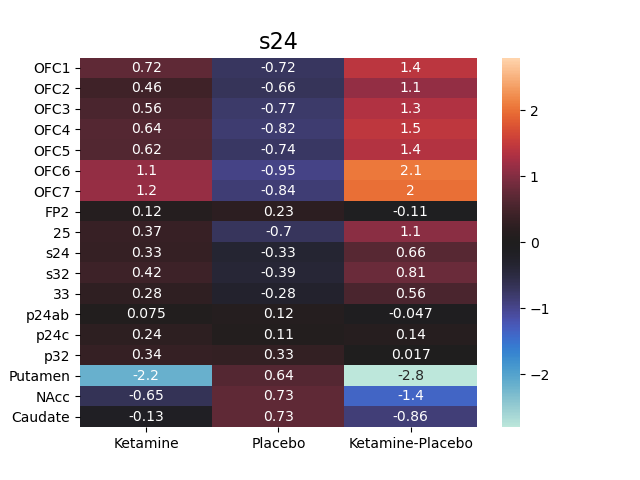

In [90]:
%matplotlib notebook
sns.heatmap(s24_df, vmin=-2.8, vmax=2.8, center=0, annot=True)
plt.title('s24', fontsize=16)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Between_ROIs_bootstrap_heatmap_s24', dpi=250)

<IPython.core.display.Javascript object>


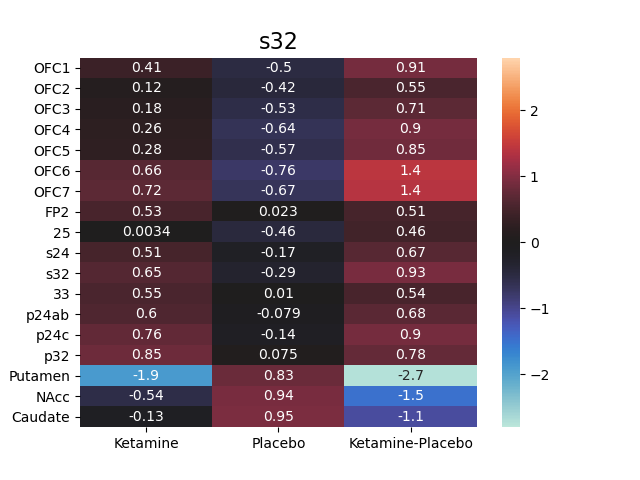

In [91]:
%matplotlib notebook
sns.heatmap(s32_df, vmin=-2.8, vmax=2.8, center=0, annot=True)
plt.title('s32', fontsize=16)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Between_ROIs_bootstrap_heatmap_s32', dpi=250)

<IPython.core.display.Javascript object>


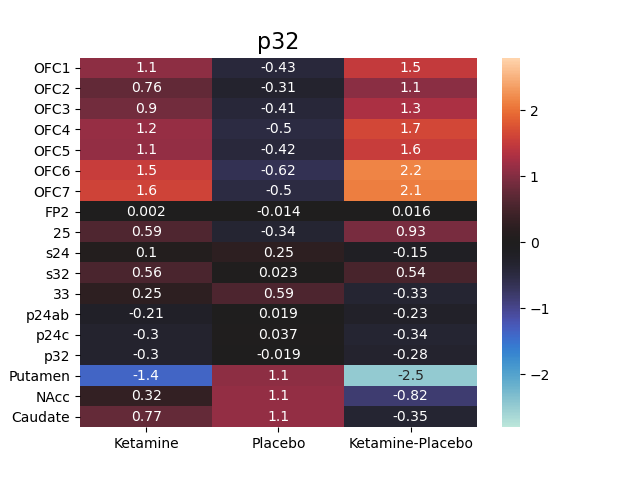

In [92]:
%matplotlib notebook
sns.heatmap(p32_df, vmin=-2.8, vmax=2.8, center=0, annot=True)
plt.title('p32', fontsize=16)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Between_ROIs_bootstrap_heatmap_p32', dpi=250)

<IPython.core.display.Javascript object>


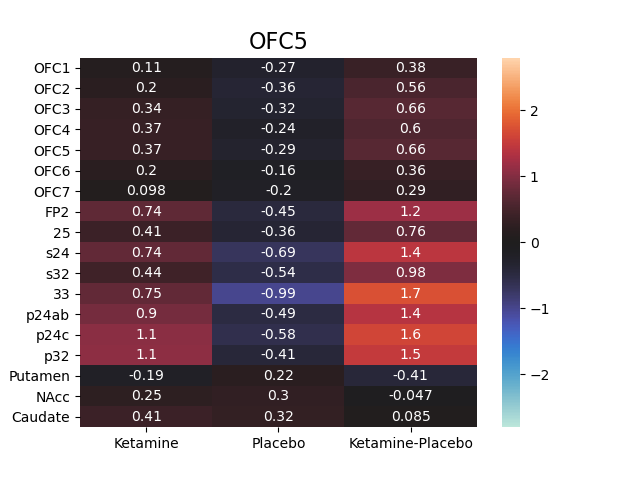

In [93]:
%matplotlib notebook
sns.heatmap(OFC5_df, vmin=-2.8, vmax=2.8, center=0, annot=True)
plt.title('OFC5', fontsize=16)
plt.savefig('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Plots/Between_ROIs_bootstrap_heatmap_OFC5', dpi=250)